In [ ]:
fci_earthquake='''Iteration History - Experiment 3 (cancer):                                                                                                                                                                                                            
----------------------------------------------------------------------                                                                                                                                                                                
Iter   SHD      LL           BIC          Edges    F1       Precision  Recall                                                                                                                                                                         
----------------------------------------------------------------------                                                                                                                                                                                
0      6.0      -3682.1074   3682.11      10       0.5714   0.4000     1.0000                                                                                                                                                                         
1      6.0      -3680.9189   3680.92      10       0.5714   0.4000     1.0000                                                                                                                                                                         
2      5.0      -3675.2033   3675.20      9        0.6154   0.4444     1.0000                                                                                                                                                                         
3      4.0      -3653.5163   3653.52      8        0.6667   0.5000     1.0000                                                                                                                                                                         
4      3.0      -3640.5188   3640.52      7        0.7273   0.5714     1.0000                                                                                                                                                                         
5      3.0      -3607.6989   3607.70      7        0.7273   0.5714     1.0000                                                                                                                                                                         
6      2.0      -3581.6296   3581.63      6        0.8000   0.6667     1.0000                                                                                                                                                                         
7      1.0      -3568.3250   3568.32      5        0.8889   0.8000     1.0000  
8      1.0      -3565.3366   3565.34      5        0.8889   0.8000     1.0000  
9      0.0      -3555.3678   3555.37      4        1.0000   1.0000     1.0000  '''
fci_child='''Iteration History - Experiment 4 (child):
----------------------------------------------------------------------
Iter   SHD      LL           BIC          Edges    F1       Precision  Recall  
----------------------------------------------------------------------
0      25.0     -33200.0664  33200.07     1        0.0000   0.0000     0.0000  
1      24.0     -33187.0239  33187.02     1        0.0769   1.0000     0.0400  
2      23.0     -32734.5403  32734.54     2        0.1481   1.0000     0.0800  
3      22.0     -32733.2819  32733.28     3        0.2143   1.0000     0.1200  
4      23.0     -32459.8602  32459.86     4        0.2069   0.7500     0.1200  
5      22.0     -31485.6758  31485.68     5        0.2667   0.8000     0.1600  
6      23.0     -31440.9108  31440.91     6        0.2581   0.6667     0.1600  '''


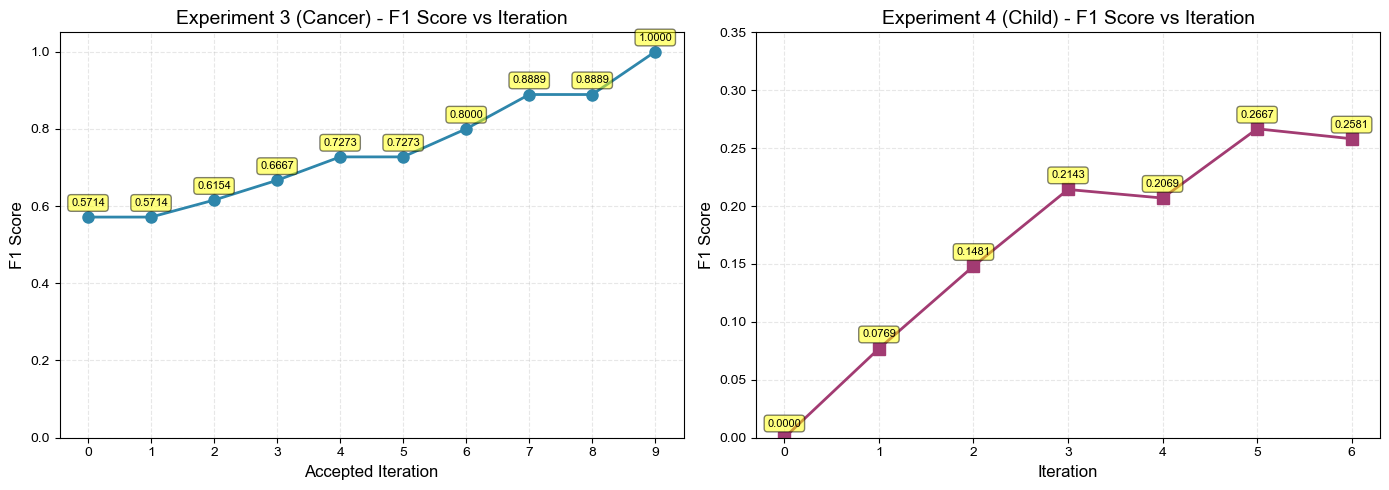

Cancer实验: F1从 0.5714 提升到 1.0000
Child实验: F1从 0.0000 提升到 0.2581


In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 原始数据
fci_earthquake = '''Iteration History - Experiment 3 (cancer):                                                                                                                                                                                            
----------------------------------------------------------------------                                                                                                                                                                                
Iter   SHD      LL           BIC          Edges    F1       Precision  Recall                                                                                                                                                                         
----------------------------------------------------------------------                                                                                                                                                                                
0      6.0      -3682.1074   3682.11      10       0.5714   0.4000     1.0000                                                                                                                                                                         
1      6.0      -3680.9189   3680.92      10       0.5714   0.4000     1.0000                                                                                                                                                                         
2      5.0      -3675.2033   3675.20      9        0.6154   0.4444     1.0000                                                                                                                                                                         
3      4.0      -3653.5163   3653.52      8        0.6667   0.5000     1.0000                                                                                                                                                                         
4      3.0      -3640.5188   3640.52      7        0.7273   0.5714     1.0000                                                                                                                                                                         
5      3.0      -3607.6989   3607.70      7        0.7273   0.5714     1.0000                                                                                                                                                                         
6      2.0      -3581.6296   3581.63      6        0.8000   0.6667     1.0000                                                                                                                                                                         
7      1.0      -3568.3250   3568.32      5        0.8889   0.8000     1.0000  
8      1.0      -3565.3366   3565.34      5        0.8889   0.8000     1.0000  
9      0.0      -3555.3678   3555.37      4        1.0000   1.0000     1.0000  '''

fci_child = '''Iteration History - Experiment 4 (child):
----------------------------------------------------------------------
Iter   SHD      LL           BIC          Edges    F1       Precision  Recall  
----------------------------------------------------------------------
0      25.0     -33200.0664  33200.07     1        0.0000   0.0000     0.0000  
1      24.0     -33187.0239  33187.02     1        0.0769   1.0000     0.0400  
2      23.0     -32734.5403  32734.54     2        0.1481   1.0000     0.0800  
3      22.0     -32733.2819  32733.28     3        0.2143   1.0000     0.1200  
4      23.0     -32459.8602  32459.86     4        0.2069   0.7500     0.1200  
5      22.0     -31485.6758  31485.68     5        0.2667   0.8000     0.1600  
6      23.0     -31440.9108  31440.91     6        0.2581   0.6667     0.1600  '''

# 解析函数
def parse_iteration_data(text):
    """解析迭代历史数据"""
    lines = text.strip().split('\n')
    data_lines = []
    
    for line in lines:
        if re.match(r'^\d+\s+', line.strip()):
            data_lines.append(line)
    
    iterations = []
    f1_scores = []
    
    for line in data_lines:
        parts = line.split()
        if len(parts) >= 6:
            iteration = int(parts[0])
            f1 = float(parts[5])
            iterations.append(iteration)
            f1_scores.append(f1)
    
    return iterations, f1_scores

# 解析数据
cancer_iter, cancer_f1 = parse_iteration_data(fci_earthquake)
child_iter, child_f1 = parse_iteration_data(fci_child)

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建图表
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左图：Cancer实验
axes[0].plot(cancer_iter, cancer_f1, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0].set_xlabel('Accepted Iteration', fontsize=12, fontweight='bold')
axes[0].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
axes[0].set_title('Experiment 3 (Cancer) - F1 Score vs Iteration', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_ylim([0, 1.05])
axes[0].set_xticks(cancer_iter)

for iter_val, f1_val in zip(cancer_iter, cancer_f1):
    axes[0].annotate(f'{f1_val:.4f}', 
                     xy=(iter_val, f1_val), 
                     xytext=(0, 8), 
                     textcoords='offset points',
                     ha='center',
                     fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

# 右图：Child实验
axes[1].plot(child_iter, child_f1, marker='s', linewidth=2, markersize=8, color='#A23B72')
axes[1].set_xlabel('Iteration', fontsize=12, fontweight='bold')
axes[1].set_ylabel('F1 Score', fontsize=12, fontweight='bold')
axes[1].set_title('Experiment 4 (Child) - F1 Score vs Iteration', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_ylim([0, 0.35])
axes[1].set_xticks(child_iter)

for iter_val, f1_val in zip(child_iter, child_f1):
    axes[1].annotate(f'{f1_val:.4f}', 
                     xy=(iter_val, f1_val), 
                     xytext=(0, 8), 
                     textcoords='offset points',
                     ha='center',
                     fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.savefig('f1_iteration_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Cancer实验: F1从 {cancer_f1[0]:.4f} 提升到 {cancer_f1[-1]:.4f}")
print(f"Child实验: F1从 {child_f1[0]:.4f} 提升到 {child_f1[-1]:.4f}")

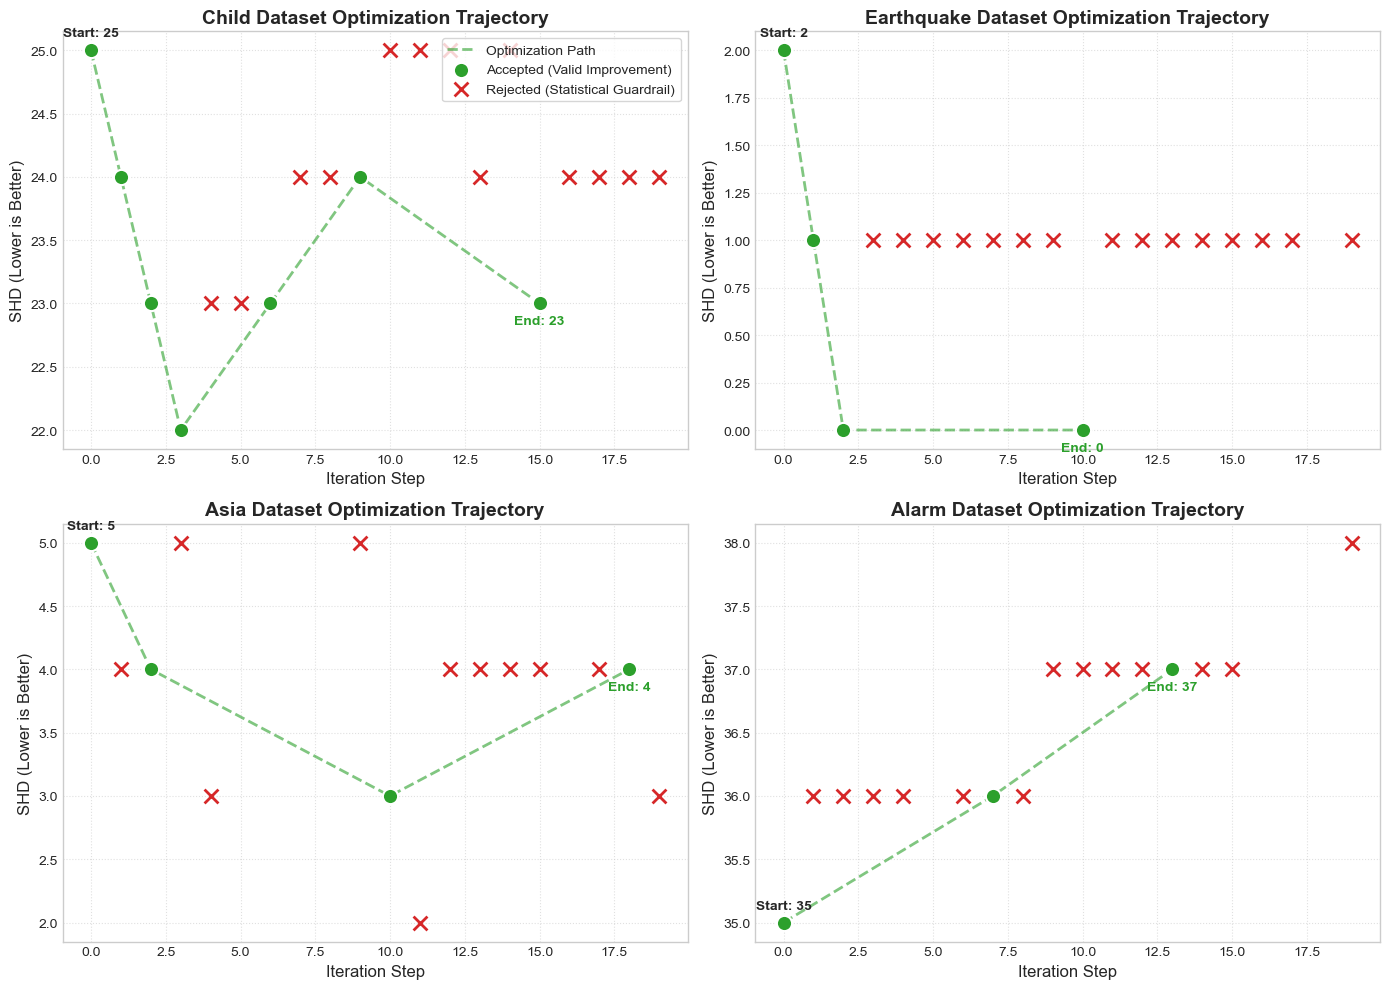

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import io

# 你的原始数据
data_child = """
Iter   Status   SHD
0      ✓        25.0
1      ✓        24.0
2      ✓        23.0
3      ✓        22.0
4      ✗        23.0
5      ✗        23.0
6      ✓        23.0
7      ✗        24.0
8      ✗        24.0
9      ✓        24.0
10     ✗        25.0
11     ✗        25.0
12     ✗        25.0
13     ✗        24.0
14     ✗        25.0
15     ✓        23.0
16     ✗        24.0
17     ✗        24.0
18     ✗        24.0
19     ✗        24.0
"""

data_earthquake = """
Iter   Status   SHD
0      ✓        2.0
1      ✓        1.0
2      ✓        0.0
3      ✗        1.0
4      ✗        1.0
5      ✗        1.0
6      ✗        1.0
7      ✗        1.0
8      ✗        1.0
9      ✗        1.0
10     ✓        0.0
11     ✗        1.0
12     ✗        1.0
13     ✗        1.0
14     ✗        1.0
15     ✗        1.0
16     ✗        1.0
17     ✗        1.0
19     ✗        1.0
"""

data_asia = """
Iter   Status   SHD
0      ✓        5.0
1      ✗        4.0
2      ✓        4.0
3      ✗        5.0
4      ✗        3.0
9      ✗        5.0
10     ✓        3.0
11     ✗        2.0
12     ✗        4.0
13     ✗        4.0
14     ✗        4.0
15     ✗        4.0
17     ✗        4.0
18     ✓        4.0
19     ✗        3.0
"""

data_alarm = """
Iter   Status   SHD
0      ✓        35.0
1      ✗        36.0
2      ✗        36.0
3      ✗        36.0
4      ✗        36.0
6      ✗        36.0
7      ✓        36.0
8      ✗        36.0
9      ✗        37.0
10     ✗        37.0
11     ✗        37.0
12     ✗        37.0
13     ✓        37.0
14     ✗        37.0
15     ✗        37.0
19     ✗        38.0
"""

def parse_data(raw_data):
    lines = [line.split() for line in raw_data.strip().split('\n') if line.strip() and not line.startswith('Iter')]
    data = []
    for line in lines:
        if len(line) < 3: continue
        data.append({
            'Iter': int(line[0]),
            'Status': line[1],
            'SHD': float(line[2]) if line[2] != 'N/A' else None,
        })
    return pd.DataFrame(data).dropna()

dfs = {
    'Child': parse_data(data_child),
    'Earthquake': parse_data(data_earthquake),
    'Asia': parse_data(data_asia),
    'Alarm': parse_data(data_alarm)
}

# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i]
    
    # 分离 Accept 和 Reject
    accepted = df[df['Status'] == '✓']
    rejected = df[df['Status'] == '✗']
    
    # 绘制优化路径 (只连接 Accepted 的点)
    ax.plot(accepted['Iter'], accepted['SHD'], color='#2ca02c', alpha=0.6, linestyle='--', linewidth=2, label='Optimization Path')
    
    # 绘制 Accepted 点 (绿色圆圈)
    ax.scatter(accepted['Iter'], accepted['SHD'], color='#2ca02c', marker='o', s=120, edgecolors='white', linewidth=1.5, label='Accepted (Valid Improvement)', zorder=5)
    
    # 绘制 Rejected 点 (红色叉号)
    # 注意：Rejected 的点的 Y 轴应该是它 *如果被接受* 会变成的 SHD
    # 这样可以看出："它试图把 SHD 变成多少，但我们拒绝了"
    ax.scatter(rejected['Iter'], rejected['SHD'], color='#d62728', marker='x', s=100, linewidth=2, label='Rejected (Statistical Guardrail)', zorder=5)
    
    # 图表装饰
    ax.set_title(f'{name} Dataset Optimization Trajectory', fontsize=14, fontweight='bold')
    ax.set_xlabel('Iteration Step', fontsize=12)
    ax.set_ylabel('SHD (Lower is Better)', fontsize=12)
    ax.grid(True, linestyle=':', alpha=0.6)
    
    # 标注起点和终点
    if not accepted.empty:
        start = accepted.iloc[0]
        end = accepted.iloc[-1]
        ax.annotate(f'Start: {int(start["SHD"])}', (start['Iter'], start['SHD']), xytext=(0,10), textcoords='offset points', ha='center', fontsize=10, fontweight='bold')
        ax.annotate(f'End: {int(end["SHD"])}', (end['Iter'], end['SHD']), xytext=(0,-15), textcoords='offset points', ha='center', fontsize=10, fontweight='bold', color='#2ca02c')

    # 图例只在第一个图显示
    if i == 0:
        ax.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig('iteration_history_viz.png', dpi=300)
plt.show()